In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [12]:
train_path = r'D:\thesis\train'
val_path = r'D:\thesis\validate'
test_path = r'D:\thesis\test'

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(224, 224), batch_size=16, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(
    val_path, target_size=(224, 224), batch_size=16, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_path, target_size=(224, 224), batch_size=16, class_mode='categorical')

Found 4277 images belonging to 334 classes.
Found 992 images belonging to 334 classes.
Found 1017 images belonging to 334 classes.


In [14]:
# Load ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False,
                      input_shape=(224, 224, 3))

# Adding custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(
    x)  # Ensure this matches the number of individuals

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
268/268 [==============================] - 137s 486ms/step - loss: 4.3245 - accuracy: 0.2107 - val_loss: 6.1413 - val_accuracy: 0.0030
Epoch 2/50
268/268 [==============================] - 121s 453ms/step - loss: 0.6890 - accuracy: 0.8845 - val_loss: 6.6010 - val_accuracy: 0.0030
Epoch 3/50
268/268 [==============================] - 118s 441ms/step - loss: 0.0682 - accuracy: 0.9960 - val_loss: 7.9976 - val_accuracy: 0.0050
Epoch 4/50
268/268 [==============================] - 120s 448ms/step - loss: 0.0299 - accuracy: 0.9979 - val_loss: 2.9351 - val_accuracy: 0.3548
Epoch 5/50
268/268 [==============================] - 122s 456ms/step - loss: 0.0299 - accuracy: 0.9967 - val_loss: 0.2247 - val_accuracy: 0.9516
Epoch 6/50
268/268 [==============================] - 121s 450ms/step - loss: 0.0083 - accuracy: 0.9993 - val_loss: 0.1789 - val_accuracy: 0.9617
Epoch 7/50
268/268 [==============================] - 120s 446ms/step - loss: 0.0812 - accuracy: 0.9876 - val_loss: 0.5080 -

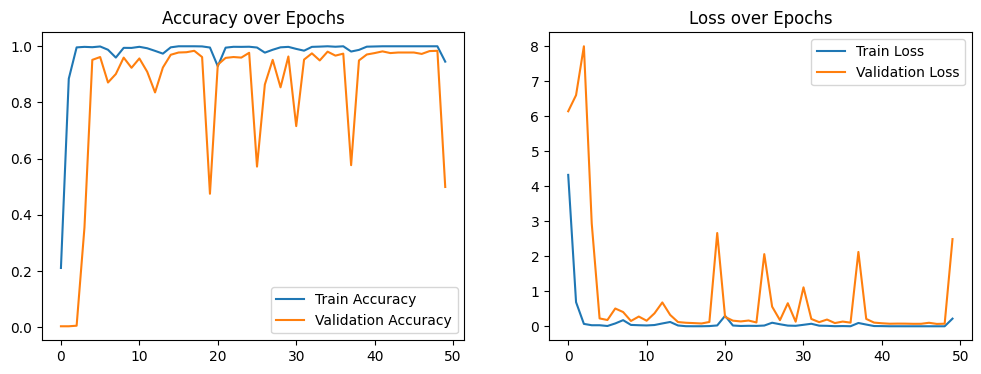

Validation Accuracy: 0.4989919364452362
64/64 [==============================] - 9s 143ms/step - loss: 2.2606 - accuracy: 0.5320
Test Loss: 2.2605931758880615
64/64 [==============================] - 9s 138ms/step - loss: 2.2606 - accuracy: 0.5320
Test accuracy: 0.5319567322731018


In [15]:
history = model.fit(train_generator, validation_data=val_generator, epochs=50,
                    steps_per_epoch=len(train_generator), validation_steps=len(val_generator))

model.save('my_resnet50_1.h5')

# Evaluate model


# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

val_accuracy = history.history['val_accuracy'][-1]
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")

test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

1/1 [==============================] - 1s 701ms/step


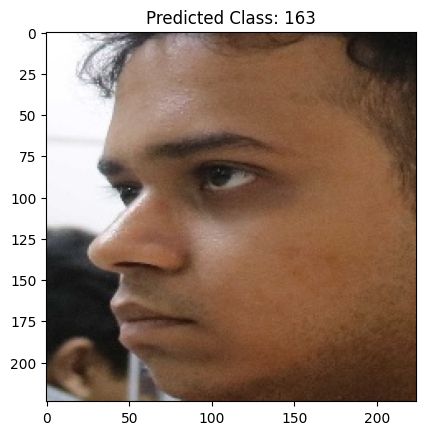

In [21]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Load the model
model = tf.keras.models.load_model(r'D:\thesis\codes\my_resnet50_1.h5')

# Path to an image from your test set
img_path = r'D:\thesis\codes\163_+70.JPG'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale pixel values to match training data

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Retrieve class labels from train_generator
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted Class: {class_labels[predicted_class[0]]}")
plt.show()

In [22]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [32]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import pandas as pd

# Load the saved model
model = tf.keras.models.load_model(r'D:\thesis\codes\my_resnet50_1.h5')

# Directory containing test images, structured in subfolders for each class
test_dir = r'D:\thesis\test_50'

# Retrieve class labels from test_generator
class_labels = {v: k for k, v in test_generator.class_indices.items()}

# Store results
results = []

# Loop through each class directory in the test set
for class_label in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_label)
    if os.path.isdir(class_dir):
        # Loop through each image in the class directory
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0  # Rescale pixel values

            # Make a prediction
            prediction = model.predict(img_array)
            predicted_class = class_labels[np.argmax(prediction, axis=1)[0]]

            # Store the results
            results.append([img_file, class_label, predicted_class])

# Create a DataFrame to display results
results_df = pd.DataFrame(
    results, columns=['Image', 'True Label', 'Predicted Label'])
print(results_df)

1/1 [==============================] - 0s 23ms/step
           Image True Label Predicted Label
0    200_+20.JPG        200             318
1    200_+30.JPG        200             142
2    200_+50.JPG        200             142
3    201_+20.JPG        201             201
4    201_-10.JPG        201             201
..           ...        ...             ...
148  249_-10.JPG        249             249
149  249_-20.JPG        249             249
150  250_+80.JPG        250             174
151  250_-20.JPG        250             250
152    250_0.JPG        250             167

[153 rows x 3 columns]


In [35]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model
model = tf.keras.models.load_model(r'D:\thesis\codes\my_resnet50_1.h5')

# Directory for test data
test_dir = r'D:\thesis\test'

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test data
for class_label in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_label)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0  # Rescale pixel values

            # Predict
            prediction = model.predict(img_array)
            predicted_class = np.argmax(prediction, axis=1)[0]

            # Append to lists
            true_labels.append(class_label)
            predicted_labels.append(predicted_class)

# Convert class labels to numeric values
label_to_index = test_generator.class_indices
index_to_label = dict((v, k) for k, v in label_to_index.items())
numeric_true_labels = [label_to_index[label] for label in true_labels]




1/1 [==============================] - 0s 20ms/step
correct [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [38]:
from sklearn.metrics import f1_score
f1 = f1_score(numeric_true_labels, predicted_labels, average='micro')

print(f"F1 Score (Micro): {f1}")

f1 = f1_score(numeric_true_labels, predicted_labels, average='macro')

print(f"F1 Score (Macro): {f1}")

f1 = f1_score(numeric_true_labels, predicted_labels, average='weighted')

print(f"F1 Score (Weighted): {f1}")

F1 Score (Micro): 0.5319567354965585
F1 Score (Macro): 0.544470947834919
F1 Score (Weighted): 0.5447206293188308


In [39]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the model
model = tf.keras.models.load_model(r'D:\thesis\codes\my_resnet50_1.h5')

# Directory for test data
test_dir = r'D:\thesis\test'

# Initialize counter for correct predictions
correct_predictions_count = 0

# Retrieve class labels from test_generator
class_labels = {v: k for k, v in test_generator.class_indices.items()}

# Loop through the test data
for class_label in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_label)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0  # Rescale pixel values

            # Predict
            prediction = model.predict(img_array)
            predicted_class = np.argmax(prediction, axis=1)[0]
            predicted_class_label = class_labels[predicted_class]

            # Check if the prediction is correct and increment the counter
            if predicted_class_label == class_label:
                correct_predictions_count += 1

# Output the total number of correct predictions
print(f"Total correct predictions: {correct_predictions_count}")

1/1 [==============================] - 0s 22ms/step
Total correct predictions: 541
